In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


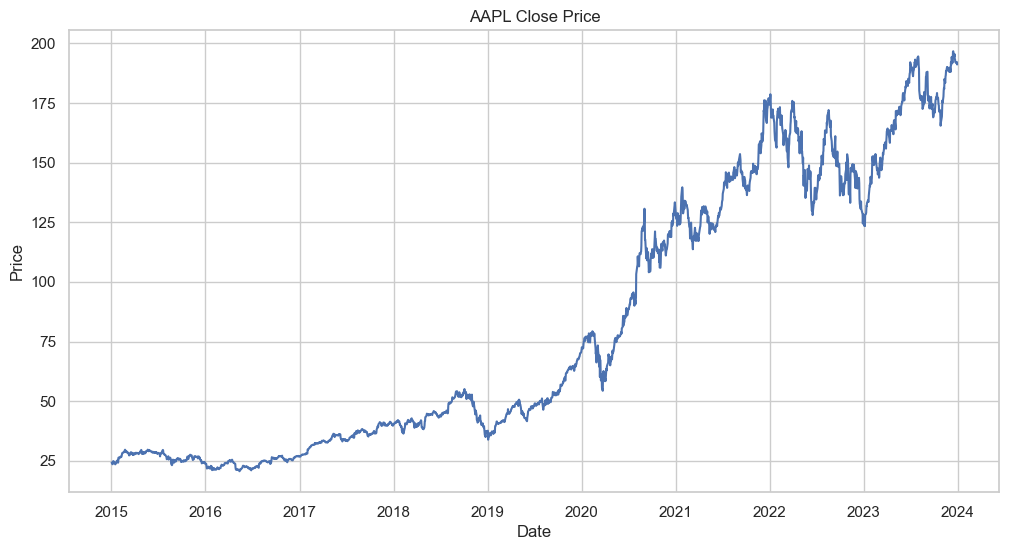

In [7]:
# Load and preprocess dataset
df = pd.read_csv("../data/raw/AAPL_stock.csv")

# Convert Date column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('B')  # Set frequency to business days

# Convert Close to float if needed
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Drop NaN values
df.dropna(subset=['Close'], inplace=True)

# Plot the Close prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("AAPL Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [8]:
# Train-test split
train = df.iloc[:-30]
test = df.iloc[-30:]


In [4]:
# Fit Exponential Smoothing model (Additive trend)
model = ExponentialSmoothing(train['Close'], trend='add', seasonal=None)
fitted_model = model.fit()


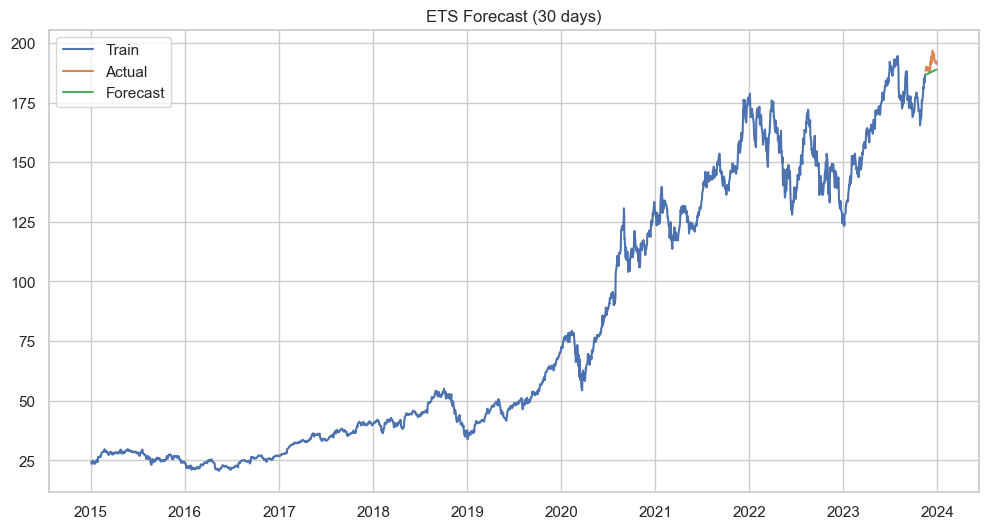

RMSE: 4.42831115838883


In [11]:
# Forecast for next 30 days
forecast_30 = fitted_model.forecast(30)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, forecast_30, label='Forecast')
plt.legend()
plt.title("ETS Forecast (30 days)")
plt.show()

# Calculate and print RMSE
rmse = sqrt(mean_squared_error(test['Close'], forecast_30))
print("RMSE:", rmse)
